In [1]:
#Slightly modified from ChatGPT

class Node:
    def __init__(self, key, weight=1, height=0, rightness = 0, left=None, right=None, parent=None, head=None, tail=None):
        self.key = key
        self.weight = weight
        self.height = height
        self.grosscost = key
        self.grossmin = key
        self.rightness = 0
        self.netcost = 0
        self.netmin = 0
        self.left = left
        self.right = right
        self.parent = parent
        self.head = head
        self.tail = tail
        self.reversed = False

class WeightBalancedTree:
    def __init__(self):
        self.root = None

    def weight(self, node):
        return 0 if node is None else node.weight

    def height(self, node):
        return -1 if node is None else node.height

    def update_weight(self, node):
        if node is not None:
            node.weight = 1 + self.weight(node.left) + self.weight(node.right)

    def update_height(self, node, current_height=0):
        if node is not None:
            node.height = current_height
            self.update_height(node.left, current_height + 1)
            self.update_height(node.right, current_height + 1)

    def update_head_tail(self, node):
        if node is not None:
            node.head = node if node.left is None else node.left.head
            node.tail = node if node.right is None else node.right.tail

    def update_parent(self, node, parent):
        if node is not None:
            node.parent = parent
            
    def update_rightness(self, node):
        if node is not None:
            node.rightness = node.parent.rightness + 1 if node.parent and node is node.parent.right else node.parent.rightness - 1 if node.parent and node is node.parent.left else 0
            self.update_rightness(node.left)
            self.update_rightness(node.right)

    def rotate_left(self, x):
        y = x.right
        x.right = y.left
        y.left = x
        self.update_weight(x)
        self.update_weight(y)
        self.update_height(x)
        self.update_height(y)
        self.update_head_tail(x)
        self.update_head_tail(y)

        # Update parent pointers
        y.parent = x.parent
        x.parent = y
        if x.right:
            x.right.parent = x
        self.update_rightness(x)
        self.update_rightness(y)
        # Update gross values
        self.update_gross(x)
        self.update_gross(y)

        return y

    def rotate_right(self, y):
        x = y.left
        y.left = x.right
        x.right = y
        self.update_weight(y)
        self.update_weight(x)
        self.update_height(y)
        self.update_height(x)
        self.update_head_tail(y)
        self.update_head_tail(x)

        # Update parent pointers
        x.parent = y.parent
        y.parent = x
        if y.left:
            y.left.parent = y
        self.update_rightness(x)
        self.update_rightness(y)
        # Update gross values
        self.update_gross(x)
        self.update_gross(y)

        return x


    def balance(self, root):
        if root is None:
            return root

        if self.weight(root.left) > 2 * self.weight(root.right):
            if self.weight(root.left.left) < self.weight(root.left.right):
                root.left = self.rotate_left(root.left)
            root = self.rotate_right(root)

        elif self.weight(root.right) > 2 * self.weight(root.left):
            if self.weight(root.right.right) < self.weight(root.right.left):
                root.right = self.rotate_right(root.right)
            root = self.rotate_left(root)

        # Update gross values after balancing
        self.update_rightness(root)
        self.update_gross(root)

        return root
    

    def update_gross(self, node):
        if node is not None and node.left is not None and node.right is not None:  # Ensure non-leaf node
            node.grosscost = min(node.key, node.left.grosscost, node.right.grosscost)
            node.grossmin = min(node.grosscost, node.left.grossmin, node.right.grossmin)
        else:  # Leaf node or null node
            node.grosscost = node.key #float('inf')
            node.grossmin = node.key #float('inf')

    def insert(self, root, key, parent=None, current_height=0):
        if root is None:
            new_node = Node(key, parent=parent, height=current_height)
            return new_node

        if key < root.key:
            root.left = self.insert(root.left, key, parent=root, current_height=current_height + 1)
        elif key > root.key:
            root.right = self.insert(root.right, key, parent=root, current_height=current_height + 1)

        self.update_weight(root)
        self.update_height(root, current_height)
        self.update_head_tail(root)
        root = self.balance(root)

        return root

    def insert_key(self, key):
        self.root = self.insert(self.root, key)

    def inorder_traversal(self, node, result):
        if node is not None:
            self.inorder_traversal(node.left, result)
            result.append({'key' : node.key, 'rightness': node.rightness, 'grosscost': node.grosscost, 'grossmin': node.grossmin, 'left': node.left.key if node.left else None, 'right': node.right.key if node.right else None, 'weight': node.weight, 'height': node.height, 'head': node.head.key if node.head else None, 'tail': node.tail.key if node.tail else None, 'parent': node.parent.key if node.parent else None})
            self.inorder_traversal(node.right, result)

    def display(self):
        result = []
        self.inorder_traversal(self.root, result)
        return result

# Example usage:
if __name__ == "__main__":
    weight_balanced_tree = WeightBalancedTree()
    keys = [9, 5, 10, 0, 6, 11, -1, 1, 2, 5.5]

    for key in keys:
        weight_balanced_tree.insert_key(key)

    print("Inorder Traversal:", weight_balanced_tree.display())


Inorder Traversal: [{'key': -1, 'rightness': -2, 'grosscost': -1, 'grossmin': -1, 'left': None, 'right': None, 'weight': 1, 'height': 2, 'head': -1, 'tail': -1, 'parent': 0}, {'key': 0, 'rightness': -1, 'grosscost': -1, 'grossmin': -1, 'left': -1, 'right': 2, 'weight': 4, 'height': 1, 'head': -1, 'tail': 2, 'parent': 5}, {'key': 1, 'rightness': -1, 'grosscost': 1, 'grossmin': 1, 'left': None, 'right': None, 'weight': 1, 'height': 3, 'head': 1, 'tail': 1, 'parent': 2}, {'key': 2, 'rightness': 0, 'grosscost': 2, 'grossmin': 2, 'left': 1, 'right': None, 'weight': 2, 'height': 2, 'head': 1, 'tail': 2, 'parent': 0}, {'key': 5, 'rightness': 0, 'grosscost': -1, 'grossmin': -1, 'left': 0, 'right': 9, 'weight': 10, 'height': 0, 'head': -1, 'tail': 11, 'parent': None}, {'key': 5.5, 'rightness': 0, 'grosscost': 5.5, 'grossmin': 5.5, 'left': None, 'right': 6, 'weight': 2, 'height': 2, 'head': 5.5, 'tail': 6, 'parent': 9}, {'key': 6, 'rightness': 1, 'grosscost': 6, 'grossmin': 6, 'left': None, 'rig

In [3]:
import heapq

class DynamicTree: #This class is based on the Sleator/Tarjan 1983 paper. The code below is a direct implementation of the pseudocode provided in that paper. ChatGPT used for constructor and add_path 
    
    def __init__(self):
        self.paths = []
        self.heap = []
        
    def add_path(self, root):
        new_path = WeightBalancedTree()
        new_path.insert_key(root.key)
        heapq.heappush(self.heap, -root.key) #negated to get a max heap
        self.paths.append(new_path)
    
    def path(self, v):
        w = v
        while w.parent != None:
            w = w.parent
        return w

    def head(self, p): #p is a path that is represented by its root (root and path are treated the same as in the Sleator/Tarjan 1983 paper)
        if p.reversed:
            return p.tail
        return p.head

    def before(self, v):
        root = self.path(v)
        head_v = self.head(root)
        if v == head_v:
            return None
        u = head_v
        while u.parent != v:
            if u == root:
                break  
            else:
                u = u.parent
        if u.parent == v:
            return u
        else:
            return v.parent

    def after(self, v):
        root = self.path(v)
        tail_v = self.tail(root)
        if v == tail_v:
            return None
        u = tail_v
        while u.parent != v:
            if u == root:
                break
            else:
                u = u.parent

        if u.parent == v:
            return u
        else:
            return v.parent


    def pcost(self, v):
        after_v = self.after(v)
        if v == after_v.parent:
            return after_v.key
        return v.key
        # nodes = []
        # w = v
        # deepest_left_child = v
        # while w.parent != None:
        #     nodes.append(w.parent)
        #     w = w.parent
        # for i in range(len(nodes) - 1, 1, -1):
        #     if nodes[i].left == nodes[i-1]:
        #         deepest_left_child = nodes[i-1]
        # return deepest_left_child.parent.grosscost

    def tail(self, p):
        if p.reversed:
            return p.head
        return p.tail

    def reverse(self, p):
        p.reversed = not p.reversed
        #temp_head = p.head
        #p.head = p.tail
        #p.tail = p.temp_head
        temp_left = p.left
        p.left = p.right
        p.right = p.temp_left
        return p

    def pupdate(self, p, x):
        p.netmin += x
        return p

    def pmincost(self, p):
        u = p
        while True:
            if (u.netcost == 0 and (u.right.netmin > 0 or (u.right.right == None and u.right.left == None))):
                break
            elif u.right.netcost == 0 and (u.right.right != None or u.right.left != None):
                u = u.right
            elif u.netcost > 0:
                u = u.left
        if u.left == None and u.right == None:
            return u
        if u.reversed:
            return u.head
        return u.tail

    def construct(self, v, w, x):
        root = Node()
        root.grosscost = x
        root.left = v
        root.right = w
        return root

    def destroy(self, u):
        v = u.left
        w = u.right
        x = u.grosscost
        del u
        return [v, w, x]
    
    def split(self, v):
        w = self.path(v)
        head_v = self.head(w)
        tail_v = self.tail(w)
        before_v = self.before(v)
        after_v = self.after(v)
        x = before_v.key
        y = v.key
        p = before_v
        q = after_v

        return [p, q, x, y]

    def concatenate(self, p, q, x):
        v = self.tail(p)
        w = self.head(q)
        return self.construct(v, w, x)

    def dparent(self, v):
        return v.parent
    
    def dcost(v):
        return v.key

    def splice(self, p):
        v = self.dparent(self.tail(p))
        q, r, x, y = self.split(v)
        if q != None:
            v, x = self.tail(q).parent, self.dcost(tail(q))
        p = self.concatenate(p, self.path(v), self.dcost(self.tail(p)))
        if r == None:
            return p
        return self.concatenate(p, r, y)

    def expose(self, v):
        q, r, x, y = self.split(v)
        if q != None:
            v, x = self.dparent(self.tail(q)), dcost(self.tail(q))
        if r == None:
            p = self.path(v)
        else:
            p = self.concatenate(self.path(v), r, y)
        while self.dparent(self.tail(p)) != None:
            p = self.splice(p)
        return p

    def parent(self, v):
        if v == self.tail(path(v)):
            return self.dparent(v)
        return self.after(v)

    def root(self, v):
        return self.tail(self.expose(v))

    def cost(self, v):
        if v == self.tail(self.path(v)):
            return self.dcost(v)
        else:
            return self.pcost(v)

    def vertex_mincost(self, v):
        return self.mincost(self.expose(v))

    def vertex_update(self, v, x):
        self.update(self.expose(v), x)

    def link(self, v, w, x):
        self.concatenate(self.path(v), self.expose(w), x)

    def cut(self, v):
        self.expose(v)
        p, q, x, y = self.split(v)
        v.parent = None
        return y

    def evert(self, v):
        self.reverse(self.expose(v))
        v.parent = None
        
    # def detect(self, delta_t, epsilon):
    #     edges = []
    #     while self.heap.top() < 0: #checking if positive but everything is negated
    #         edges.append(

In [6]:
# Initialize a DynamicTree instance
dynamic_tree = DynamicTree()

# Test cases for all methods in the DynamicTree class
def test_dynamic_tree():
    # Test add_path method
    dynamic_tree.add_path(Node(10))  # Add a path with root key 10
    print("Paths:", dynamic_tree.paths)
    print("Heap:", dynamic_tree.heap)

    # Test path method
    v = Node(5)
    path = dynamic_tree.path(v)
    print("Path key:", path.key)

    # Test head method
    head_node = dynamic_tree.head(path)
    print("Head node:", head_node.key)

    # Test before method
    before_node = dynamic_tree.before(v)
    print("Before node:", before_node.key)

    # Test after method
    after_node = dynamic_tree.after(v)
    print("After node:", after_node)

    # Test pcost method
    pcost_value = dynamic_tree.pcost(v)
    print("Pcost value:", pcost_value)

    # Test tail method
    tail_node = dynamic_tree.tail(path)
    print("Tail node:", tail_node.key)

    # Test reverse method
    reversed_path = dynamic_tree.reverse(path)
    print("Reversed path:", reversed_path)

    # Test pupdate method
    updated_path = dynamic_tree.pupdate(path, 3)
    print("Updated path netmin:", updated_path.netmin)

    # Test pmincost method
    mincost_node = dynamic_tree.pmincost(path)
    print("Pmincost node:", mincost_node.key)

    # Test construct method
    constructed_node = dynamic_tree.construct(Node(2), Node(3), 4)
    print("Constructed node key:", constructed_node.key)
    print("Constructed node left key:", constructed_node.left.key)
    print("Constructed node right key:", constructed_node.right.key)

    # Test destroy method
    destroyed_nodes = dynamic_tree.destroy(constructed_node)
    print("Destroyed nodes:", [node.key for node in destroyed_nodes])

    # Test split method
    p, q, x, y = dynamic_tree.split(v)
    print("Split p:", p.key)
    print("Split q:", q.key)
    print("Split x:", x)
    print("Split y:", y)

    # Test concatenate method
    concatenated_node = dynamic_tree.concatenate(p, q, 15)
    print("Concatenated node key:", concatenated_node.key)
    print("Concatenated node left key:", concatenated_node.left.key)
    print("Concatenated node right key:", concatenated_node.right.key)

    # Test dparent method
    dparent_value = dynamic_tree.dparent(v)
    print("Dparent value:", dparent_value)

    # Test dcost method
    dcost_value = dynamic_tree.dcost(v)
    print("Dcost value:", dcost_value)

    # Test splice method
    spliced_node = dynamic_tree.splice(path)
    print("Spliced node key:", spliced_node.key)

    # Test expose method
    exposed_path = dynamic_tree.expose(v)
    print("Exposed path key:", exposed_path.key)

    # Test parent method
    parent_node = dynamic_tree.parent(v)
    print("Parent node:", parent_node.key)

    # Test root method
    root_node = dynamic_tree.root(v)
    print("Root node:", root_node.key)

    # Test cost method
    cost_value = dynamic_tree.cost(v)
    print("Cost value:", cost_value)

    # Test vertex_mincost method
    mincost_node = dynamic_tree.vertex_mincost(v)
    print("Vertex mincost node:", mincost_node.key)

    # Test vertex_update method
    dynamic_tree.vertex_update(v, 7)
    print("Updated cost value:", dynamic_tree.cost(v))

    # Test link method
    dynamic_tree.link(Node(3), Node(4), 8)
    # Add more tests for the link method if needed

    # Test cut method
    result = dynamic_tree.cut(v)
    print("Cut result:", result)

    # Test evert method
    dynamic_tree.evert(v)
    print("Everted root node:", dynamic_tree.root(v).key)

# Run the test cases
test_dynamic_tree()

Paths: [<__main__.WeightBalancedTree object at 0x000001E1F7C390D0>]
Heap: [-10]
Path key: 5


AttributeError: 'NoneType' object has no attribute 'key'

In [52]:
class Node:
    def __init__(self, key, length, gradient):
        self.key = key
        self.parent = None
        self.left = None
        self.right = None
        self.flow = 0  # flow value on the edge towards the parent
        self.length = length  # length of the edge towards the parent
        self.gradient = gradient  # gradient along the edge towards the parent
        self.positive_flow = 0  # positive flow along the edge towards the parent

    def is_root(self):
        return not self.parent or (self.parent.left != self and self.parent.right != self)

    def update_flow(self):
        self.flow = (self.left.flow if self.left else 0) + (self.right.flow if self.right else 0)

    def update_length(self):
        self.length = (self.left.length if self.left else 0) + (self.right.length if self.right else 0)

    def update_gradient(self):
        self.gradient = (self.left.gradient if self.left else 0) + (self.right.gradient if self.right else 0)

    def rotate(self):
        p = self.parent
        if self == p.left:
            p.left = self.right
            if self.right:
                self.right.parent = p
            self.right = p
        else:
            p.right = self.left
            if self.left:
                self.left.parent = p
            self.left = p
        p.update_flow()
        p.update_length()
        p.update_gradient()
        self.update_flow()
        self.update_length()
        self.update_gradient()
        self.parent = p.parent
        p.parent = self
        if self.parent:
            if self.parent.left == p:
                self.parent.left = self
            else:
                self.parent.right = self

    def splay(self):
        while not self.is_root():
            p = self.parent
            if p.is_root():
                self.rotate()
            else:
                gp = p.parent
                if (p.left == self) == (gp.left == p):
                    p.rotate()
                else:
                    self.rotate()
                self.rotate()


class LinkCutTree:
    def __init__(self, n, lengths, gradients):
        self.nodes = [Node(i, lengths[i], gradients[i]) for i in range(n)]
        self.flow = [0] * n
        self.positive_flow = [0] * n

    def access(self, v):
        self.splay(v)
        if v.right:
            v.right.parent = None
            v.right = None
        while v.parent:
            w = v.parent
            self.splay(w)
            if w.right:
                w.right.parent = None
            w.right = v
            v.parent = None
            self.update(w)
        self.splay(v)

    def get_root(self, v):
        self.access(v)
        while v.left:
            v = v.left
        v.splay()
        return v

    def connect(self, v, w):
        self.access(v)
        self.access(w)
        self.access(v)  # Access v again to ensure it's splayed to the root
        w.splay()  # Splay w to the root
        w.right = v
        v.parent = w

    def link(self, v, w):
        self.access(v)
        self.access(w)
        v.parent = w

    def cut(self, v):
        self.access(v)
        if v.left:
            v.left.parent = None
        v.left = None
    # Other methods remain the same...

# Test functions and other parts of the code remain the same...

    def flow_update(self, u, v, eta):
        """Update the flow along the path from node u to node v."""
        self.access(u)
        self.access(v)
        while u.parent:
            u.flow += eta
            u = u.parent

    def path_update(self, v, w, eta):
        self.access(v)
        self.access(w)
        while v.parent:
            v.flow += eta * v.right.length  # Update flow along edge
            v.splay()
            v = v.parent
        w.flow += eta * w.right.length  # Update flow along edge

    def positive_flow_update(self, v, w, eta):
        self.access(v)
        self.access(w)
        while v.parent:
            v.positive_flow += eta  # Update positive flow along edge
            v.splay()
            v = v.parent
        w.positive_flow += eta  # Update positive flow along edge

    def query_flow(self, v):
        self.access(v)
        return v.flow

    def query_edge_flow(self, u, v):
        self.access(u)
        self.access(v)
        result = 0
        while u.parent:
            if u == v:
                break
            if u.parent == v:
                result += u.right.flow
                break
            if u.right:
                result += u.right.flow
            u = u.parent
        return result

    def query_positive_flow(self, v):
        self.access(v)
        return v.positive_flow

    def indicator_vector(self, u, v):
        self.access(u)
        self.access(v)
        indicator = [0] * len(self.nodes)
        while u.parent:
            if u == v:
                break
            if u.parent == v:
                indicator[u.key] = 1
                break
            if u.right:
                indicator[u.key] = 1
            u = u.parent
        return indicator


# Example usage:
n = 6  # number of nodes
lengths = [2, 3, 4, 1, 5, 2]  # lengths of edges
gradients = [0.5, 0.7, 0.8, 0.3, 0.9, 0.6]  # gradients along edges
tree = LinkCutTree(n, lengths, gradients)

# Connect nodes
tree.connect(tree.nodes[1], tree.nodes[0])
tree.connect(tree.nodes[2], tree.nodes[0])
tree.connect(tree.nodes[3], tree.nodes[1])
tree.connect(tree.nodes[4], tree.nodes[1])
tree.connect(tree.nodes[5], tree.nodes[2])

# Add positive flow along path
eta = 0.01  # Given parameter
indicator = tree.indicator_vector(tree.nodes[3], tree.nodes[5])
tree.positive_flow_update(tree.nodes[3], tree.nodes[5], eta)

# Query positive flow
positive_flow = tree.query_positive_flow(tree.nodes[3])
print("Positive flow at node 3:", positive_flow)

AttributeError: 'LinkCutTree' object has no attribute 'splay'

In [43]:
#Written by ChatGPT

import random
import time

def test_insertion_deletion(n, num_examples):
    total_time = 0
    for _ in range(num_examples):
        lengths = [random.randint(1, 10) for _ in range(n)]
        gradients = [random.random() for _ in range(n)]
        tree = LinkCutTree(n, lengths, gradients)
        
        start_time = time.time()
        # Test insertion and deletion operations
        for _ in range(n):  # Perform insertions
            node = random.choice(tree.nodes)
            tree.access(node)
        for _ in range(n):  # Perform deletions
            node = random.choice(tree.nodes)
            tree.cut(node)
        end_time = time.time()
        total_time += end_time - start_time
    
    avg_time = total_time / num_examples
    #print(f"Average time for insertion/deletion for n={n}: {avg_time:.6f} seconds")
    return avg_time

def test_inner_products(n, num_examples):
    total_time = 0
    for _ in range(num_examples):
        lengths = [random.randint(1, 10) for _ in range(n)]
        gradients = [random.random() for _ in range(n)]
        tree = LinkCutTree(n, lengths, gradients)
        
        start_time = time.time()
        # Test inner product operations
        for _ in range(n):  # Perform inner product queries
            node1 = random.choice(tree.nodes)
            node2 = random.choice(tree.nodes)
            tree.access(node1)
            tree.access(node2)
            
            # Compute inner product along the path from node1 to node2
            path_nodes = set()
            while node1:
                path_nodes.add(node1)
                node1 = node1.parent
            
            inner_product = 0
            while node2:
                if node2 in path_nodes:
                    break  # Reached the lowest common ancestor
                if node2.parent:  # Check if node2 has a parent
                    inner_product += sum(a * b for a, b in zip(node2.gradient, node2.parent.gradient))
                node2 = node2.parent
                
        end_time = time.time()
        total_time += end_time - start_time
    
    avg_time = total_time / num_examples
    #print(f"Average time for inner products for n={n}: {avg_time:.6f} seconds")
    return avg_time

def test_flow_updates(n, num_examples):
    total_time = 0
    for _ in range(num_examples):
        lengths = [random.randint(1, 10) for _ in range(n)]
        gradients = [random.random() for _ in range(n)]
        tree = LinkCutTree(n, lengths, gradients)
        
        start_time = time.time()
        # Test flow update operations
        for _ in range(n):  # Perform flow updates
            node1 = random.choice(tree.nodes)
            node2 = random.choice(tree.nodes)
            tree.access(node1)
            tree.access(node2)
            # Update flow
            eta = random.random()  # Example value for eta
            tree.flow_update(node1, node2, eta)
        end_time = time.time()
        total_time += end_time - start_time
    
    avg_time = total_time / num_examples
    #print(f"Average time for flow updates for n={n}: {avg_time:.6f} seconds")
    return avg_time

def test_positive_flow_updates(n, num_examples):
    total_time = 0
    for _ in range(num_examples):
        lengths = [random.randint(1, 10) for _ in range(n)]
        gradients = [random.random() for _ in range(n)]
        tree = LinkCutTree(n, lengths, gradients)
        
        start_time = time.time()
        # Test positive flow update operations
        for _ in range(n):  # Perform positive flow updates
            node1 = random.choice(tree.nodes)
            node2 = random.choice(tree.nodes)
            tree.access(node1)
            tree.access(node2)
            # Update positive flow
            eta = random.random()  # Example value for eta
            tree.positive_flow_update(node1, node2, eta)
        end_time = time.time()
        total_time += end_time - start_time
    
    avg_time = total_time / num_examples
    #print(f"Average time for positive flow updates for n={n}: {avg_time:.6f} seconds")
    return avg_time


# Example usage
n = 1000  # Size of the tree
num_examples = 20  # Number of examples to run

test_insertion_deletion(n, num_examples)
test_inner_products(n, num_examples)
test_flow_updates(n, num_examples)
test_positive_flow_updates(n, num_examples)

0.00447613000869751

In [46]:
import numpy as np
from tqdm import tqdm

times1 = []
times2 = []
times3 = []
times4 = []

for n in tqdm(np.arange(100, 10100, 100)):
    times1.append(test_insertion_deletion(n, num_examples))
    times2.append(test_inner_products(n, num_examples))
    times3.append(test_flow_updates(n, num_examples))
    times4.append(test_positive_flow_updates(n, num_examples))

100%|██████████| 100/100 [03:37<00:00,  2.17s/it]


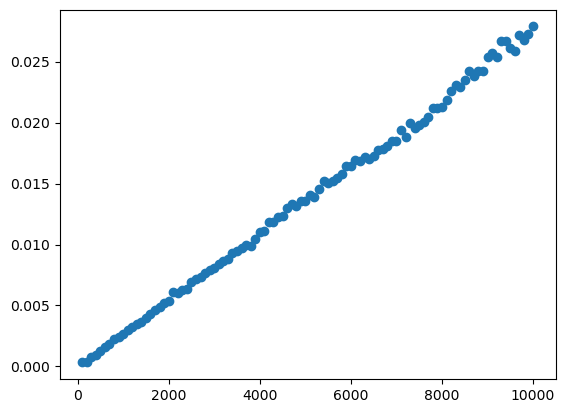

In [47]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(100, 10100, 100), times1)
plt.show()

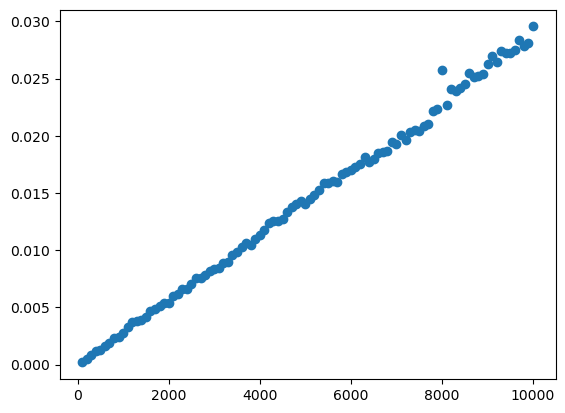

In [48]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(100, 10100, 100), times2)
plt.show()

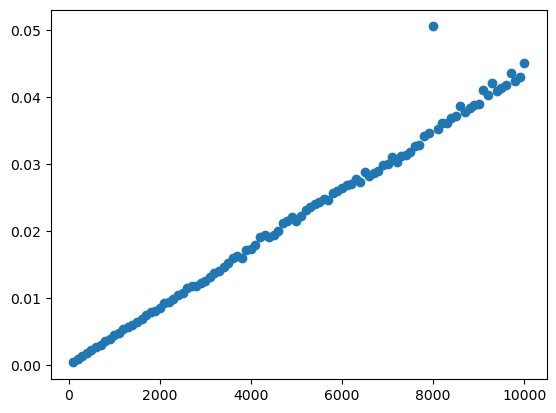

In [49]:
import matplotlib.pyplot as plt
plt.scatter(np.arange(100, 10100, 100), times3)
plt.show()

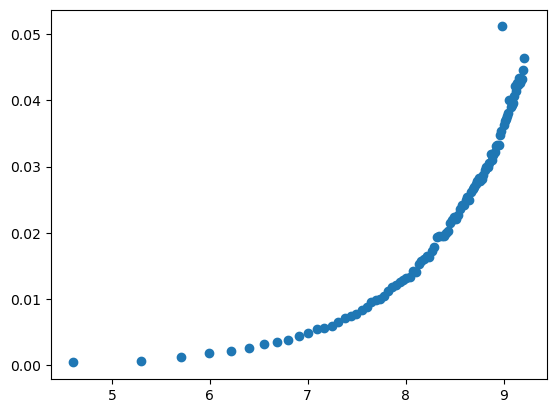

In [51]:
import matplotlib.pyplot as plt
plt.scatter(np.log(np.arange(100, 10100, 100)), times4)
plt.show()